<a href="https://github.com/maticvl/dataHacker/tree/master/pyTorch" target="_parent">This example extends the examples at this link</a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

### What is the main goal of this model?
The main goal is to separate a set of numbers into two classes. How can we achieve this?\
We will use the linear model and plug in a `sigmoid` function. This function will produce a value between 0 and 1 instead of real numbers. It is a type of activation function that restricts the output to a range between 0 and 1.

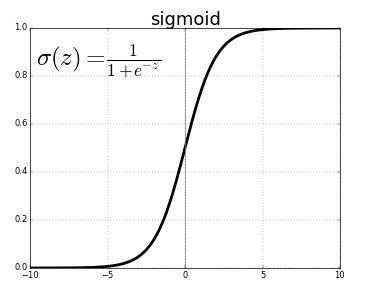

### What loss function are we going to use for this problem?
We will be using the `cross-entropy loss function`. It measures the performance of a classification model whose output is a probability value between 0 and 1.

$$ J = -\frac{1}{m} \sum_{i=1}^m y^{(i)}  [\log(\hat{y}^{(i)}) + (1-y^{(i)} )  \log(1-\hat{y}^{(i)})]$$

### Logistic Regression in Neural Network format:
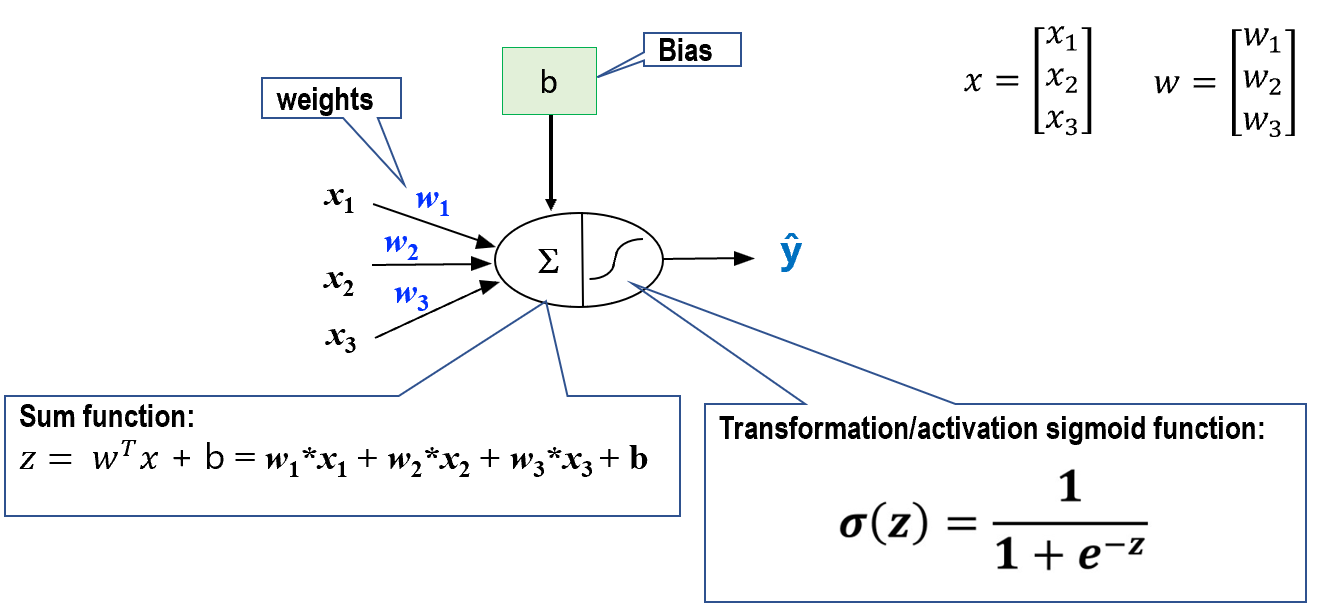

### Logistic Regression in PyTorch

We will create two blobs of data, class 0 and class 1. These values will be randomly generated using a function `make_blobs` from `sklearn`. We will choose 200 samples for each of the classes, and set `cluster_std` parameter to `1.4`, so that the data is not completely separated. We also need to convert the data from numpy array to tensors.

In [35]:
from sklearn.datasets import make_blobs

In [36]:
X, y = make_blobs(n_samples=[200, 200], random_state=2, n_features=2, cluster_std=1.4)

X = torch.from_numpy(X).type(torch.FloatTensor)
# Reshape y to 2D tensor of shape (n, 1)
y = torch.from_numpy(y).type(torch.FloatTensor).reshape(-1, 1)

print("X shape", X.shape, ". y shape", y.shape)
print(X[:5])
print(y[:5])

X shape torch.Size([400, 2]) . y shape torch.Size([400, 1])
tensor([[ 0.9811, -8.8856],
        [-0.8678, -2.3374],
        [ 1.2544, -1.5154],
        [-1.9269, -8.9902],
        [-1.8671, -9.6667]])
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.]])


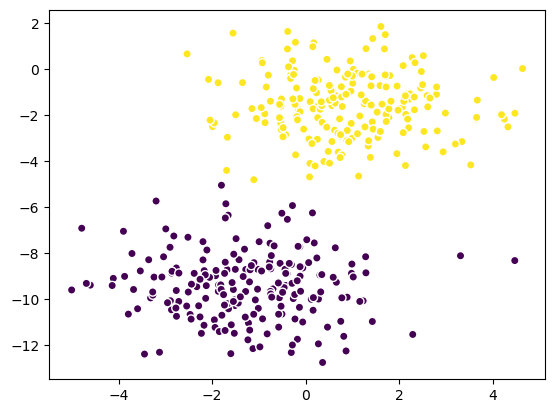

In [37]:
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='w')

## Logistic Regression in PyTorch
Now, comes the part where we define our logistic model. The linear layer accepts a vector of 2 numbers and the output layer will return 1 number as the output.\
`torch.nn.Linear(2, 1)`\
Also in the forward pass we will use the `sigmoid function` on the `y_hat` and return that result.\
`torch.sigmoid(y_hat)`

In [38]:
# build the model
LogisticRegression = nn.Sequential(
    nn.Linear(2,1),   # input layer
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
)

LogisticRegression


""" class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(2, 1)

  def forward(self, x):
    y_hat = self.linear(x)
    return torch.sigmoid(y_hat) """

' class LogisticRegression(torch.nn.Module):\n  def __init__(self):\n    super(LogisticRegression, self).__init__()\n    self.linear = torch.nn.Linear(2, 1)\n\n  def forward(self, x):\n    y_hat = self.linear(x)\n    return torch.sigmoid(y_hat) '

Define an optimizer for updating the `weight` and `bias` and also define a loss function. We mentioned earlier that we are going to use `binary cross-entropy`. 

In [39]:
classifier = LogisticRegression
optimizer = torch.optim.SGD(classifier.parameters(), lr=0.01)
lossfun = torch.nn.BCELoss()

We will train our model `2000` times. The first step to training a model is to do some predictions, so we will do the forward pass by passing the `X`. After this step, we calculate the loss using the `criterion` and then do the backpropagation step using `.backward()` on the loss. Update the parameters, `.step()` and reset the gradients, `.zero_grad()`.

In [40]:
losses = []

# train the model
numepochs = 1000
for epoch in range(numepochs):
  # forward pass
  y_hat = classifier(X)

  # compute loss
  loss = lossfun(y_hat, y)
  losses.append(loss.item())

  # backward pass (backpropagation)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

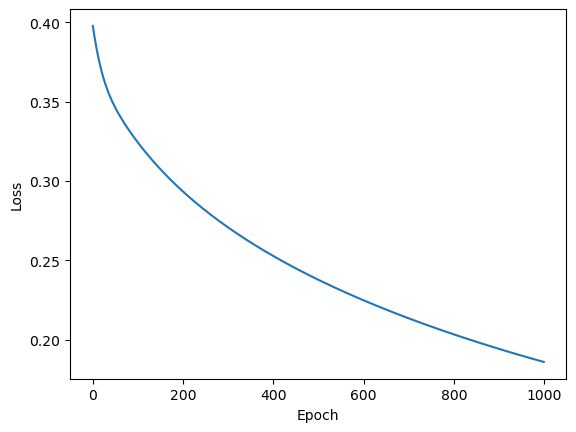

In [41]:
# show the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

If we want to check the values for the calculated parameters we can access them in the `model.named_paramters()`. We can see that there are `2 weight` parameters now and one `bias`.

In [42]:
for name, parameter in classifier.named_parameters():
  print(name, parameter)

0.weight Parameter containing:
tensor([[0.7392, 0.4121]], requires_grad=True)
0.bias Parameter containing:
tensor([1.4554], requires_grad=True)


We will use the `model.forward()` function to do some predictions on the `X` values.\
If we check the values of `y_pred`, we can see that they are ranging from 0 to 1

In [43]:
y_pred = classifier.forward(X)
print(y_pred[:10])
y_pred_class = [1 if i > 0.5 else 0 for i in y_pred.detach().numpy()]
print(y_pred_class[:10])

tensor([[0.1852],
        [0.4627],
        [0.8530],
        [0.0247],
        [0.0197],
        [0.1243],
        [0.0214],
        [0.0198],
        [0.7779],
        [0.7685]], grad_fn=<SliceBackward0>)
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]


We can then plot these values and color them depending on their class.

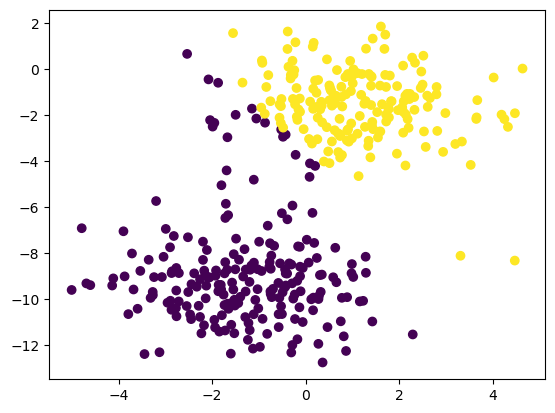

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_class)